# Scaling Exercises

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

In [2]:
from wrangle_zillow import wrangle_zillow

local version found!


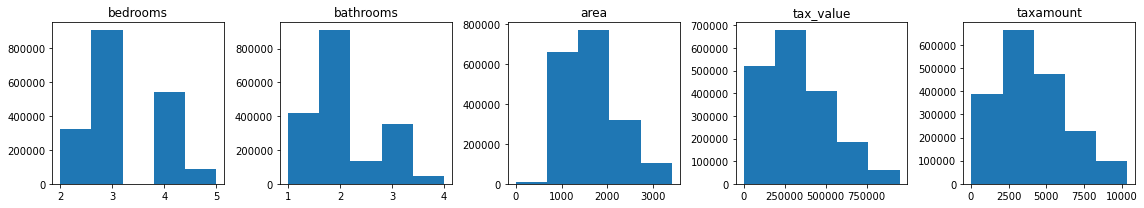

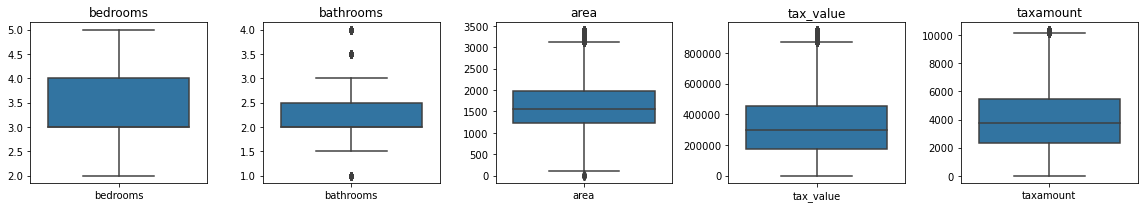

In [3]:
train, validate, test = wrangle_zillow()

In [4]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built', 'taxamount',
       'fips'],
      dtype='object')

In [11]:
train.drop(columns=['tax_value',
                              'fips',
                              'year_built']
                    ).columns.to_list()

['bedrooms', 'bathrooms', 'area', 'taxamount']

In [5]:
# things I (maybe) want to scale:
# let's grab everything but the target and fips + year
columns = train.drop(columns=['tax_value',
                              'fips',
                              'year_built']
                    ).columns.to_list()

In [6]:
columns

['bedrooms', 'bathrooms', 'area', 'taxamount']

In [7]:
# separate X and y:
X = train.drop(columns='tax_value')
y = train[['tax_value']]

In [8]:
# I can make a copy of my data if I want to do
# dumb stuff with it 
X_scaled = X.copy()

In [13]:
# X[columns]

[<AxesSubplot:> <AxesSubplot:>]
AxesSubplot(0.125,0.71587;0.352273x0.16413)
AxesSubplot(0.547727,0.71587;0.352273x0.16413)
[<AxesSubplot:> <AxesSubplot:>]
AxesSubplot(0.125,0.518913;0.352273x0.16413)
AxesSubplot(0.547727,0.518913;0.352273x0.16413)
[<AxesSubplot:> <AxesSubplot:>]
AxesSubplot(0.125,0.321957;0.352273x0.16413)
AxesSubplot(0.547727,0.321957;0.352273x0.16413)
[<AxesSubplot:> <AxesSubplot:>]
AxesSubplot(0.125,0.125;0.352273x0.16413)
AxesSubplot(0.547727,0.125;0.352273x0.16413)


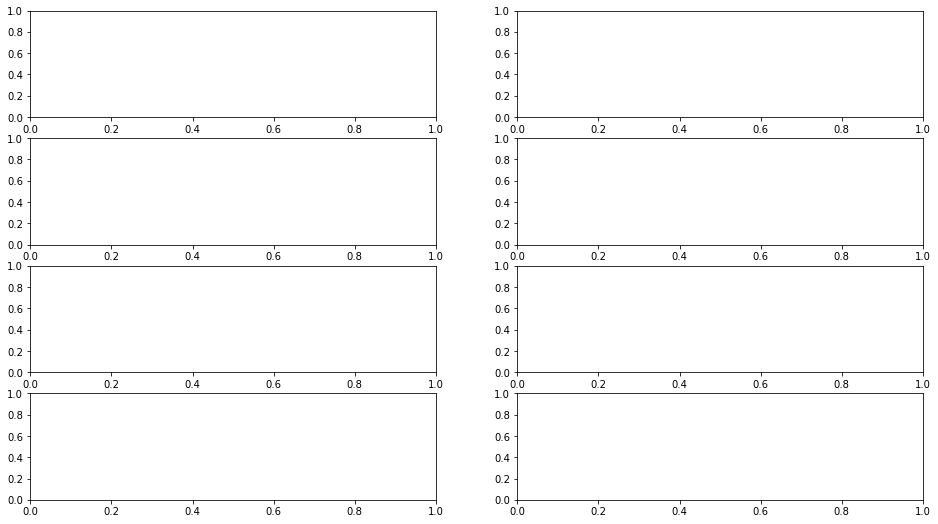

In [17]:
# fig and axes can be referenced at the object
# level if we call plt.subplotS**
fig, axs = plt.subplots(len(columns), 2, figsize=(16,9))
for ax in axs:
    print(ax)
    print(ax[0])
    print(ax[1])

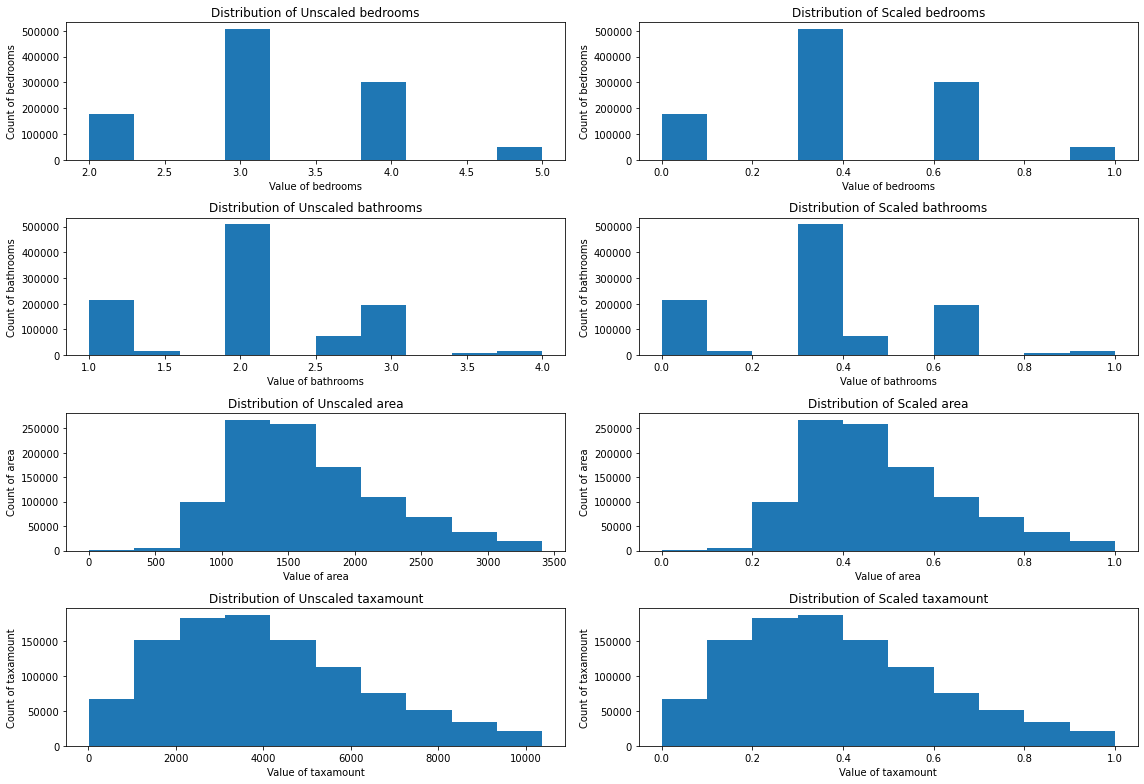

In [26]:
# Copy of X with just the "columns" :X_scaled[columns]
# make a scaler:
mmscaler = MinMaxScaler().fit(X_scaled[columns])
X_scaled[columns] = mmscaler.transform(X_scaled[columns])
# alternatively, X_scaled[columns] = MinMaxScaler().fit_transform(X_scaled[columns])
fig, axs = plt.subplots(len(columns), 2, figsize=(16,11))
for (ax1, ax2), col in zip(axs, columns):
    ax1.hist(X[col])
    ax1.set(title=f'Distribution of Unscaled {col}',
            xlabel=f'Value of {col}',
            ylabel=f'Count of {col}')
    ax2.hist(X_scaled[col])
    ax2.set(title=f'Distribution of Scaled {col}',
            xlabel=f'Value of {col}',
            ylabel=f'Count of {col}')
plt.tight_layout()
plt.show()

In [27]:
def make_and_vis(scaler, X, columns): 
    X_scaled = X.copy()
    X_scaled[columns] = scaler.fit_transform(X_scaled[columns])
    fig, axs = plt.subplots(len(columns), 2, figsize=(16,11))
    for (ax1, ax2), col in zip(axs, columns):
        ax1.hist(X[col])
        ax1.set(title=f'Distribution of Unscaled {col}',
                xlabel=f'Value of {col}',
                ylabel=f'Count of {col}')
        ax2.hist(X_scaled[col])
        ax2.set(title=f'Distribution of Scaled {col}',
                xlabel=f'Value of {col}',
                ylabel=f'Count of {col}')
    plt.tight_layout()
    plt.show()

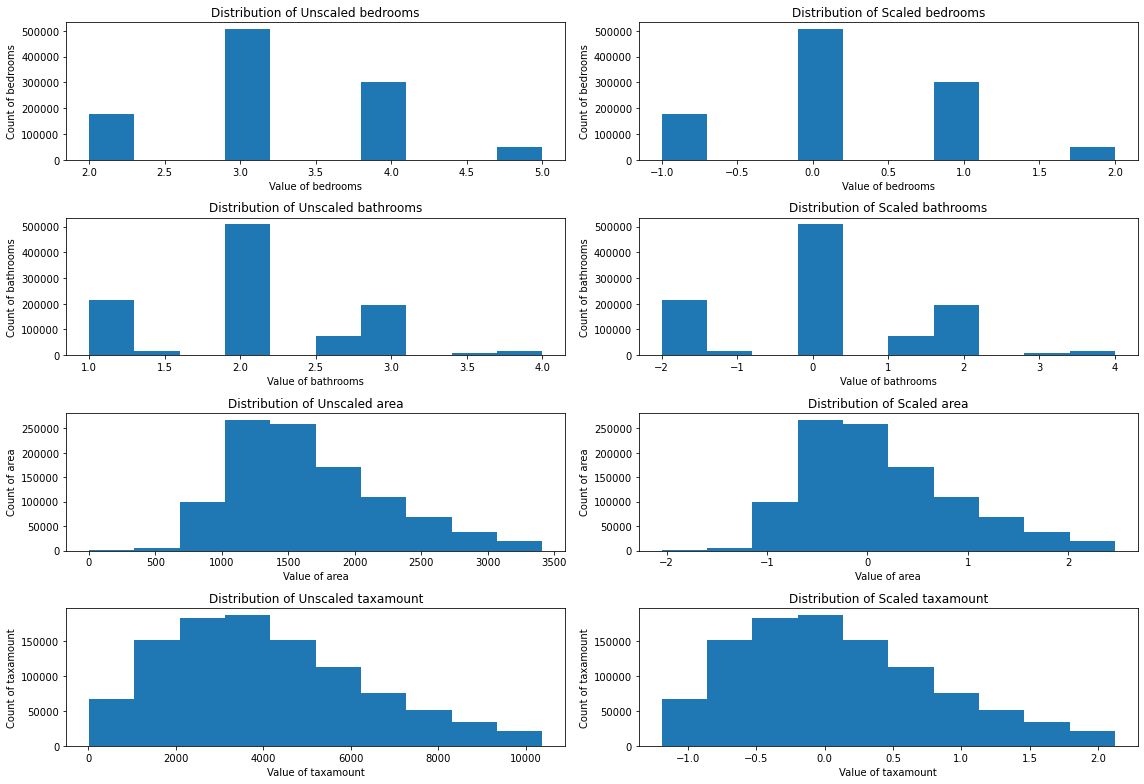

In [29]:
make_and_vis(RobustScaler(), X, columns)

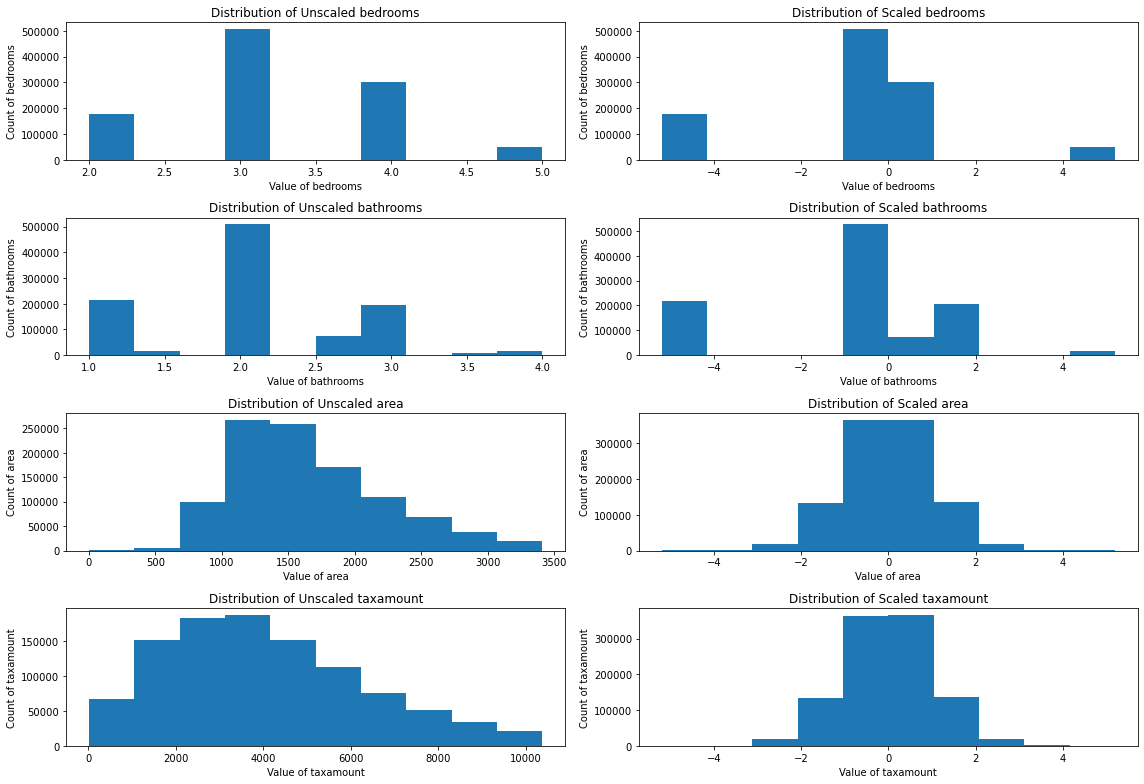

In [32]:
make_and_vis(QuantileTransformer(output_distribution='normal'), X, columns)

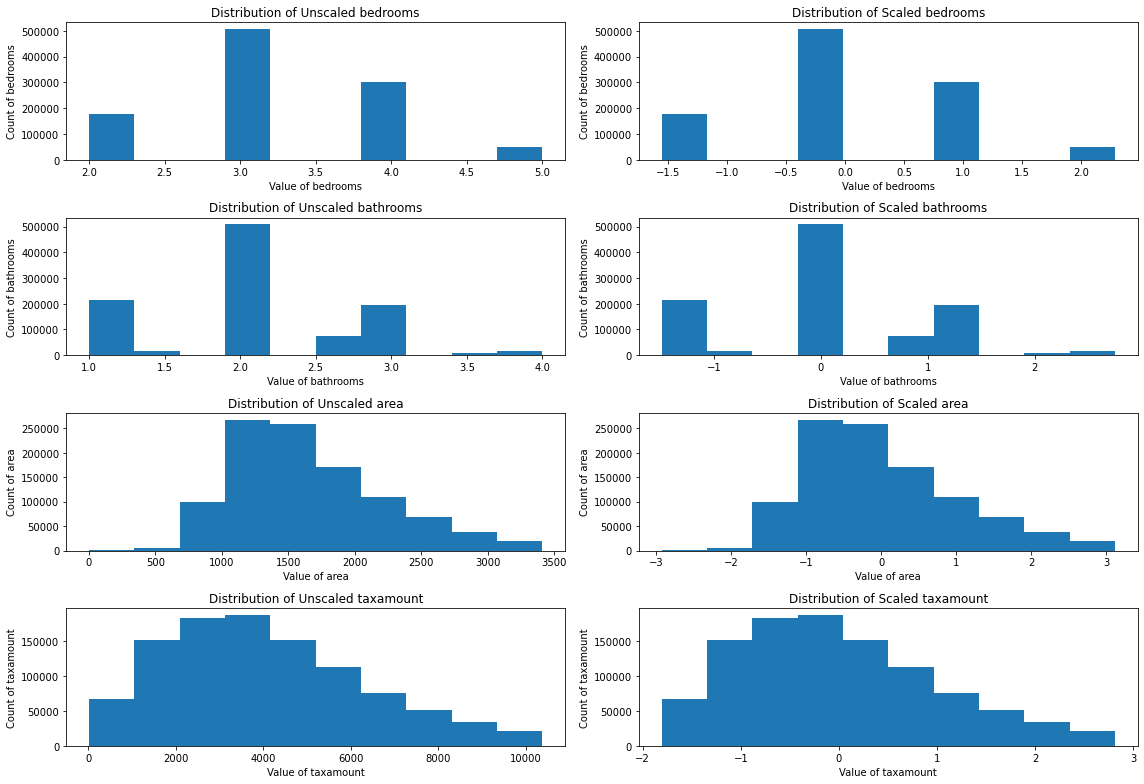

In [31]:
make_and_vis(StandardScaler(), X, columns)

### 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [36]:
newscaler = MinMaxScaler().fit(X[['taxamount']])

In [37]:
inverse_transformed = mmscaler.inverse_transform(X[columns])

In [38]:
inverse_transformed[:4, :]

array([[4.00000e+00, 2.00000e+00, 1.56100e+03, 2.50440e+03],
       [3.00000e+00, 2.00000e+00, 1.77000e+03, 1.67193e+03],
       [2.00000e+00, 1.00000e+00, 1.45200e+03, 1.31088e+03],
       [3.00000e+00, 1.00000e+00, 1.00000e+03, 1.90028e+03]])

In [40]:
X[columns].values[:4, :]

array([[4.00000e+00, 2.00000e+00, 1.56100e+03, 2.50440e+03],
       [3.00000e+00, 2.00000e+00, 1.77000e+03, 1.67193e+03],
       [2.00000e+00, 1.00000e+00, 1.45200e+03, 1.31088e+03],
       [3.00000e+00, 1.00000e+00, 1.00000e+03, 1.90028e+03]])

In [41]:
X[columns].values[:4, :] == inverse_transformed[:4, :]

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

**From sklearn.preprocessing.QuantileTransformer documentation:**

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

### Creating a Pipeline Function

In [25]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedrooms', 'bathrooms', 'tax_value'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[columns_to_scale])
    # applying the scaler:
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values, 
                                                  index = train.index)
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled